# Price Prediction using Regression

This is a tickets pricing monitoring system. It scrapes tickets pricing data periodically and stores it in a database. Ticket pricing changes based on demand and time, and there can be significant difference in price. We are creating this product mainly with ourselves in mind. Users can set up alarms using an email, choosing an origin and destination (cities), time (date and hour range picker) choosing a price reduction over mean price, etc.

**Following is the description for columns in the dataset**<br>
- insert_date: date and time when the price was collected and written in the database<br>
- origin: origin city <br>
- destination: destination city <br>
- start_date: train departure time<br>
- end_date: train arrival time<br>
- train_type: train service name<br>
- price: price<br>
- train_class: ticket class, tourist, business, etc.<br>
- fare: ticket fare, round trip, etc <br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

#### **Task 1: Import Dataset and create a copy of that dataset**

In [2]:
#write code here
data = pd.read_csv("data1.csv")
df = data.copy()

#### **Task 2: Display first five rows** 

In [3]:
#write code here
df.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,702,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,703,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,704,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,705,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,706,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


#### **Task 3: Drop 'unnamed: 0' column**

In [4]:
df.columns

Index(['Unnamed: 0', 'insert_date', 'origin', 'destination', 'start_date',
       'end_date', 'train_type', 'price', 'train_class', 'fare'],
      dtype='object')

In [5]:
#write code here
df = df.drop(['Unnamed: 0'], axis=1)
df

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo
...,...,...,...,...,...,...,...,...,...
215904,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 17:00:00,2019-06-01 19:38:00,AVE,47.30,Turista,Promo
215905,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 18:00:00,2019-06-01 20:32:00,AVE,47.30,Turista,Promo
215906,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 19:00:00,2019-06-01 21:38:00,AVE,47.30,Turista,Promo
215907,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 20:35:00,2019-06-01 23:15:00,AVE,47.30,Turista,Promo


#### **Task 4: Check the number of rows and columns**

In [6]:
#write code here
df.shape

(215909, 9)

#### **Task 5: Check data types of all columns**

In [7]:
#write code here
df.dtypes

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

#### **Task 6: Check summary statistics**

In [8]:
#write code here
df.describe()

,price
count,202321.000000
mean,56.723877
std,25.531787
min,16.600000
25%,28.350000
50%,53.400000
75%,76.300000
max,206.800000


#### **Task 7: Check summary statistics of all columns, including object dataypes**

In [9]:
df.describe(include='all')

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
count,215909,215909,215909,215909,215909,215909,202321.000000,215266,215266
unique,30543,5,5,2231,2870,16,NaN,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,NaN,Turista,Promo
freq,90,110440,105469,2089,1278,126577,NaN,164016,132065
mean,NaN,NaN,NaN,NaN,NaN,NaN,56.723877,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,25.531787,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,16.600000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,28.350000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,53.400000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,76.300000,NaN,NaN


**Question: Explain the summary statistics for the above data set**

**Answer:**
1) The dataframe contains a total of 215909 rows and 9 colums. 
2) There are Missing values in price, train_class, and fare columns.
3) origin, destination, train class and fare has 5 unique data
4) The busiest station is MADRID
5) most popular train class is Turista
6) most bought ticket is fare
7) price range: 16.6-206.8, average 56.73

#### **Task 8: Check null values in dataset**

In [10]:
#write code here
df.isnull().sum()

insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

#### **Task 9: Fill the Null values in the 'price' column.**<br>
*Hint: Take mean*

In [11]:
#write code here
df['price'].fillna(df['price'].mean(), inplace=True)

In [12]:
df

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo
...,...,...,...,...,...,...,...,...,...
215904,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 17:00:00,2019-06-01 19:38:00,AVE,47.30,Turista,Promo
215905,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 18:00:00,2019-06-01 20:32:00,AVE,47.30,Turista,Promo
215906,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 19:00:00,2019-06-01 21:38:00,AVE,47.30,Turista,Promo
215907,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 20:35:00,2019-06-01 23:15:00,AVE,47.30,Turista,Promo


In [13]:
df.isnull().sum()

insert_date      0
origin           0
destination      0
start_date       0
end_date         0
train_type       0
price            0
train_class    643
fare           643
dtype: int64

#### **Task 10: Drop the rows containing Null values in the attributes train_class and fare**

In [14]:
df.columns

Index(['insert_date', 'origin', 'destination', 'start_date', 'end_date',
       'train_type', 'price', 'train_class', 'fare'],
      dtype='object')

In [15]:
#write code here
dfresult = df.dropna(subset=['fare', 'train_class'], axis=0, how='any')
dfresult

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo
...,...,...,...,...,...,...,...,...,...
215904,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 17:00:00,2019-06-01 19:38:00,AVE,47.30,Turista,Promo
215905,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 18:00:00,2019-06-01 20:32:00,AVE,47.30,Turista,Promo
215906,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 19:00:00,2019-06-01 21:38:00,AVE,47.30,Turista,Promo
215907,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 20:35:00,2019-06-01 23:15:00,AVE,47.30,Turista,Promo


#### **Task 11: Drop 'insert_date'**

In [16]:
#write code here
dfresult = dfresult.drop('insert_date', axis=1)
dfresult

,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo
...,...,...,...,...,...,...,...,...
215904,MADRID,SEVILLA,2019-06-01 17:00:00,2019-06-01 19:38:00,AVE,47.30,Turista,Promo
215905,MADRID,SEVILLA,2019-06-01 18:00:00,2019-06-01 20:32:00,AVE,47.30,Turista,Promo
215906,MADRID,SEVILLA,2019-06-01 19:00:00,2019-06-01 21:38:00,AVE,47.30,Turista,Promo
215907,MADRID,SEVILLA,2019-06-01 20:35:00,2019-06-01 23:15:00,AVE,47.30,Turista,Promo


**Check null values again in dataset**

In [17]:
#write code here
dfresult.isnull().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

#### **Task 12: Plot number of people boarding from different stations**


In [18]:
#write code here
dfresult['origin'].unique()

array(['PONFERRADA', 'MADRID', 'SEVILLA', 'VALENCIA', 'BARCELONA'],
      dtype=object)

In [19]:
dfresult['origin'].value_counts().reset_index(name='no_of_people')

,origin,no_of_people
0,MADRID,109975
1,BARCELONA,39479
2,VALENCIA,36297
3,SEVILLA,26979
4,PONFERRADA,2536


<Axes: xlabel='origin', ylabel='count'>

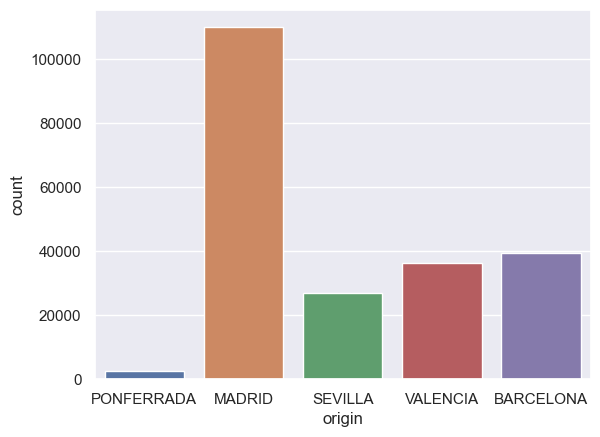

In [20]:
sns.countplot(x='origin', data=dfresult)

**Question: What insights do you get from the above plot?**

**Answer:** The above plot shows that MADRID is the busiest station, most passengers originate from this station followed by BARCELONA.
Perhaps due to MADRID being the capital and largest city of Spain. According to the website https://earth.esa.int/: The population of the city is roughly 3.3 million and the entire population of the Madrid metropolitan area is calculated to be around 6.5 million.

#### **Task 13: Plot number of people for the destination stations**


In [21]:
#write code here
dfresult['destination'].unique()

array(['MADRID', 'VALENCIA', 'BARCELONA', 'PONFERRADA', 'SEVILLA'],
      dtype=object)

In [22]:
dfresult['destination'].value_counts().reset_index(name='no_of_people')

,destination,no_of_people
0,MADRID,105291
1,BARCELONA,40728
2,VALENCIA,39447
3,SEVILLA,26961
4,PONFERRADA,2839


<Axes: xlabel='destination', ylabel='count'>

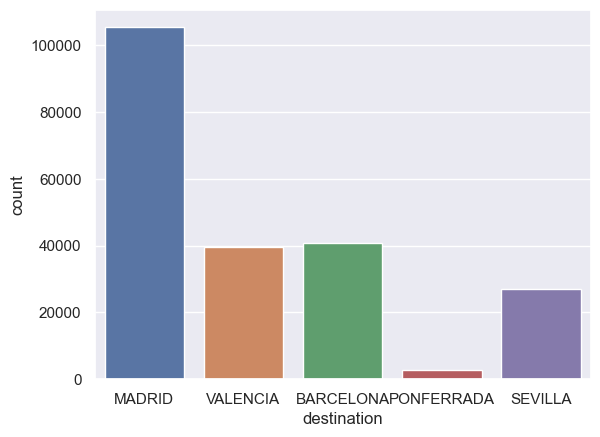

In [23]:
sns.countplot(x='destination', data=dfresult)

**Question: What insights do you get from the above graph?**

**Answer:** The plot above shows MADRID as the top destination, perhaps due to highest dense in terms of popolation and according to https://earth.esa.int/, MADRID is located on the Manzanares River (central Spain), Madrid is the capital of the country and of the autonomous region and province of Madrid.
Madrid is the 17th most livable city in the world according to Monocle magazine, in its 2014 index. Madrid houses the headquarters of the World Tourism Organization (WTO), belonging to the United Nations Organization (UN), the SEGIB, the Organization of Ibero-American States (OEI), and the Public Interest Oversight Board (PIOB). It also hosts major international institutions regulators of Spanish: the Standing Committee of the Association of Spanish Language Academies, headquarters of the Royal Spanish Academy (RAE), the Cervantes Institute and the Foundation of Urgent Spanish (Fundéu BBVA).

#### **Task 14: Plot different types of train that runs in Spain**


In [24]:
#write code here
dfresult['train_type'].unique()

array(['MD-AVE', 'MD-LD', 'ALVIA', 'REGIONAL', 'AVE', 'INTERCITY',
       'AVE-MD', 'AVE-LD', 'R. EXPRES', 'AVE-TGV', 'AV City', 'MD',
       'LD-MD', 'LD', 'LD-AVE', 'TRENHOTEL'], dtype=object)

In [25]:
dfresult['train_type'].value_counts().reset_index()

,train_type,count
0,AVE,126085
1,REGIONAL,52857
2,ALVIA,7508
3,R. EXPRES,6365
4,AV City,5430
5,INTERCITY,4434
6,AVE-TGV,3391
7,MD-LD,1498
8,LD-MD,1418
9,AVE-MD,1341


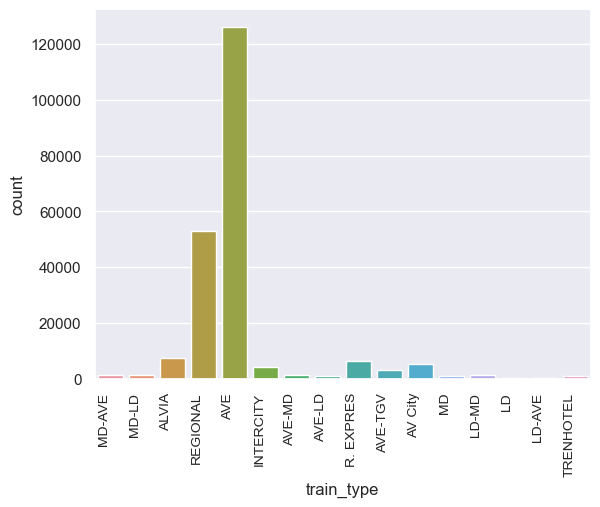

In [26]:
sns.countplot(x='train_type', data=dfresult)
plt.xticks(fontsize=10, rotation=90, ha='right')
plt.show()

C:\Users\Enviro Global\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


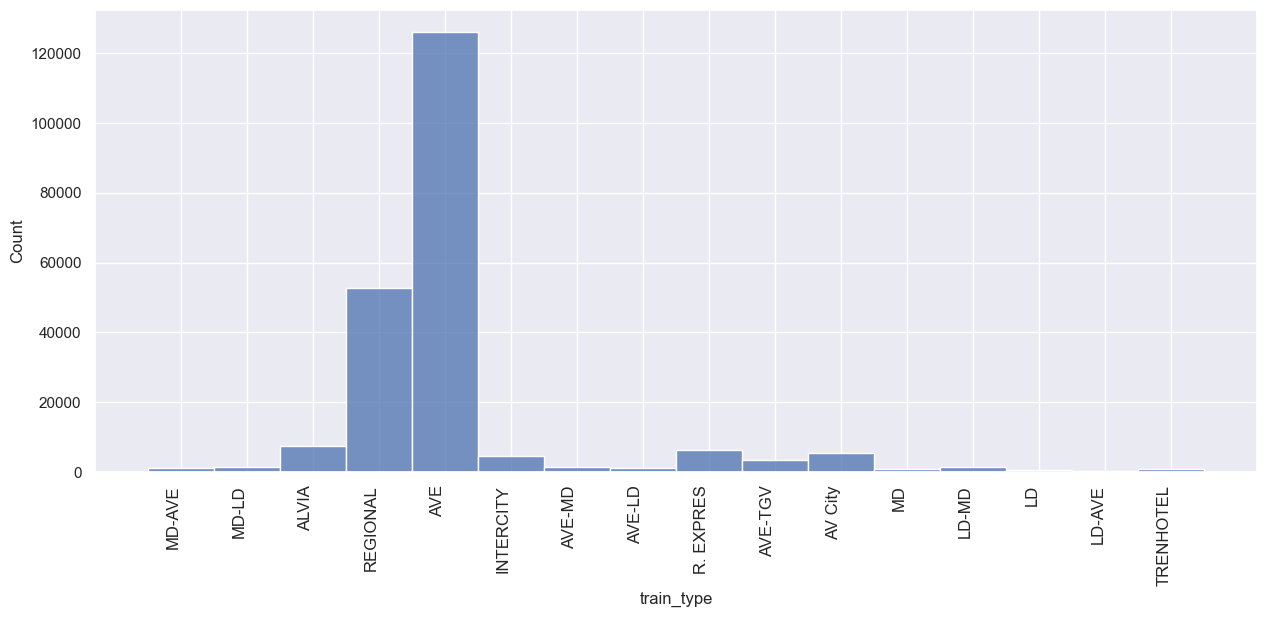

In [27]:
plt.subplots(figsize=(15,6))
sns.histplot(dfresult['train_type'])
plt.xticks(fontsize=12, rotation=90, ha='right')
plt.show()

**Question: Which train runs the maximum in number as compared to other train types?**

**Answer:** The train that runs the maximum number of passengers is **AVE**.


#### **Task 15: Plot number of trains of different class**


In [28]:
#write code here
dfresult['train_class'].value_counts().reset_index()

,train_class,count
0,Turista,164016
1,Preferente,24476
2,Turista Plus,19922
3,Turista con enlace,6827
4,Cama Turista,25


In [29]:
dfresult.groupby(['train_type', 'train_class'])['train_class'].count()

train_type  train_class       
ALVIA       Preferente             3605
            Turista                3873
            Turista Plus             30
AV City     Turista                2598
            Turista Plus           2832
AVE         Preferente            19802
            Turista               90394
            Turista Plus          15889
AVE-LD      Preferente                9
            Turista                 200
            Turista Plus             22
            Turista con enlace      869
AVE-MD      Turista                  69
            Turista con enlace     1272
AVE-TGV     Preferente              215
            Turista                2730
            Turista Plus            446
INTERCITY   Preferente               50
            Turista                3699
            Turista Plus            685
LD          Turista con enlace      421
LD-AVE      Preferente               22
            Turista                 337
            Turista Plus             16
LD-MD    

<Axes: xlabel='train_class', ylabel='count'>

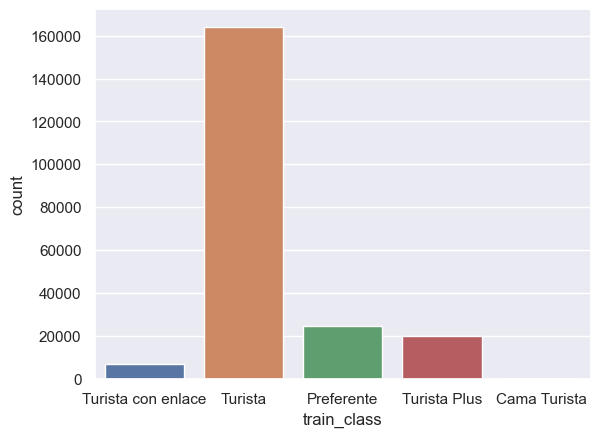

In [30]:
sns.countplot(x='train_class', data=dfresult)

**Question: Which the most common train class for traveling among people in general?**

**Answer:** The most common Train class for travelling among people in general is **Turista**


#### **Task 16: Plot number of tickets bought from each category**


In [31]:
#write code here
dfresult['fare'].unique()

array(['Flexible', 'Promo +', 'Promo', 'Adulto ida', 'Mesa'], dtype=object)

In [32]:
dfresult['fare'].value_counts().reset_index()

,fare,count
0,Promo,132065
1,Adulto ida,59222
2,Flexible,20810
3,Promo +,3081
4,Mesa,88


<Axes: xlabel='fare', ylabel='count'>

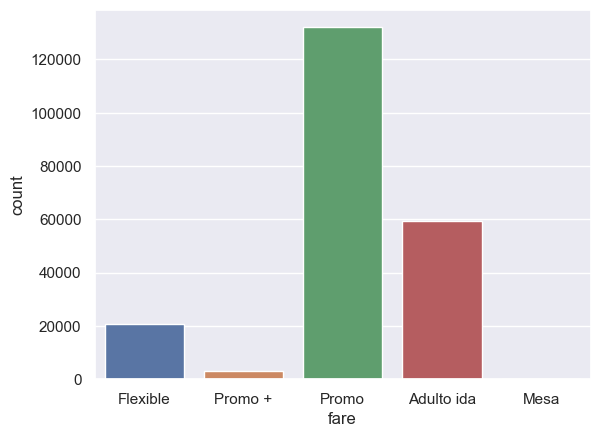

In [33]:
sns.countplot(x='fare', data=dfresult)

**Question: Which the most common tickets are bought?**

**Answer:** 
The most commonly purchased ticket type is **Promo Fare**

#### **Task 17: Plot distribution of the ticket prices**

Text(0.5, 1.0, 'Distribution of Ticket Price')

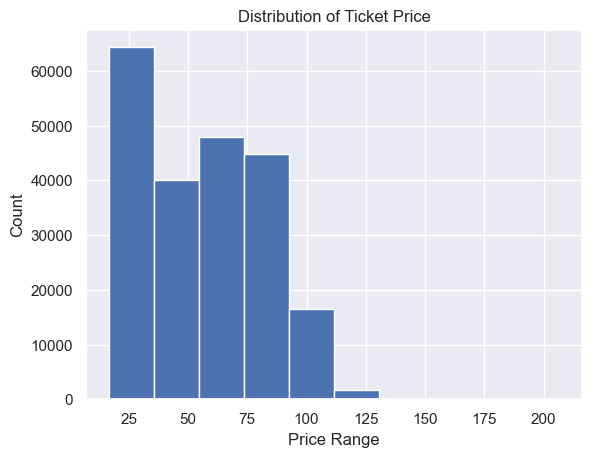

In [34]:
#write code here
dfresult['price'].hist()
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Ticket Price')

**Question: What readings can you get from the above plot?**

**Answer:**  Majority of the purchased tickets cost ranges from around **16-28**.        

###### **Task 18: Show train_class vs price through boxplot**

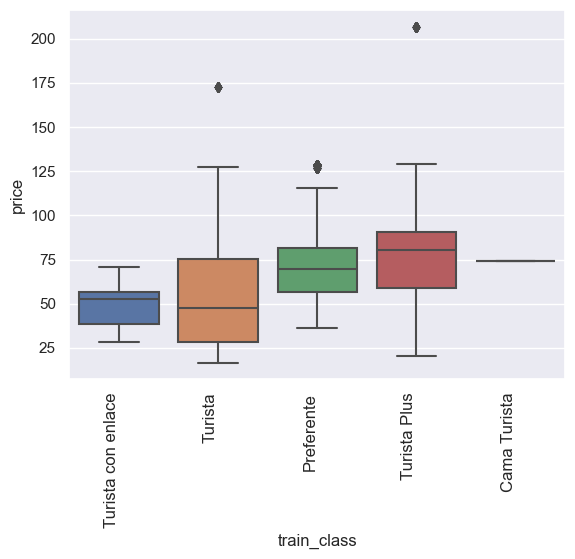

In [35]:
#write code here
sns.boxplot(x='train_class', y='price', data=dfresult)
plt.xticks(fontsize=12, rotation=90, ha='right')
plt.show()

**Question: What pricing trends can you find out by looking at the plot above?**

**Answer:** The plot above shows that the average price for Turista is the lowest as compared to the other train class, that is probably the reason why it is the most popular. 

#### **Task 19: Show train_type vs price through boxplot**


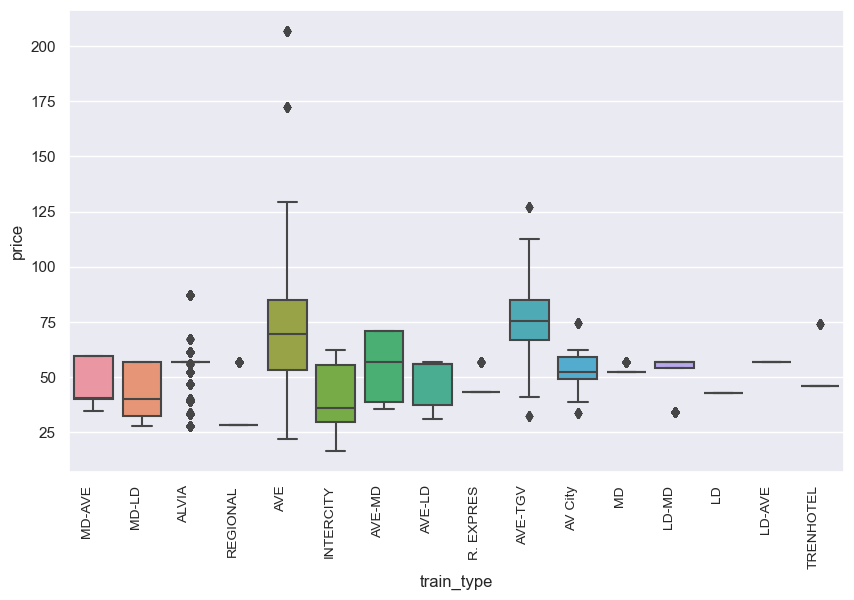

In [36]:
#write code here
plt.figure(figsize=(10,6))
sns.boxplot(x='train_type', y='price', data=dfresult)
plt.xticks(fontsize=10, rotation=90, ha='right')
plt.show()

**Question: Which type of trains cost more as compared to others?**

**Answer:** The type of trains which cost more than the others are **AVE** and **AVE-TGV**.



## Feature Engineering


In [37]:
df = df.reset_index()
df

,index,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,0,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,1,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,2,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,3,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,4,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo
...,...,...,...,...,...,...,...,...,...,...
215904,215904,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 17:00:00,2019-06-01 19:38:00,AVE,47.30,Turista,Promo
215905,215905,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 18:00:00,2019-06-01 20:32:00,AVE,47.30,Turista,Promo
215906,215906,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 19:00:00,2019-06-01 21:38:00,AVE,47.30,Turista,Promo
215907,215907,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 20:35:00,2019-06-01 23:15:00,AVE,47.30,Turista,Promo


**Finding the travel time between the place of origin and destination**<br>
We need to find out the travel time for each entry which can be obtained from the 'start_date' and 'end_date' column. Also if you see, these columns are in object type therefore datetimeFormat should be defined to perform the necessary operation of getting the required time.

**Import datetime library**

In [38]:
#write code here
import datetime

In [39]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = datetime.datetime.strptime(b, datetimeFormat)- datetime.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)                  

In [40]:
df['travel_time_in_hrs'] = df.apply(lambda x:fun(x['start_date'],x['end_date']),axis=1) 
df

,index,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,travel_time_in_hrs
0,0,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible,4.700000
1,1,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +,5.800000
2,2,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +,5.916667
3,3,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +,4.983333
4,4,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo,4.133333
...,...,...,...,...,...,...,...,...,...,...,...
215904,215904,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 17:00:00,2019-06-01 19:38:00,AVE,47.30,Turista,Promo,2.633333
215905,215905,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 18:00:00,2019-06-01 20:32:00,AVE,47.30,Turista,Promo,2.533333
215906,215906,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 19:00:00,2019-06-01 21:38:00,AVE,47.30,Turista,Promo,2.633333
215907,215907,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 20:35:00,2019-06-01 23:15:00,AVE,47.30,Turista,Promo,2.666667


#### **Task 20: Remove redundant features**


**You need to remove features that are giving the related values as  'travel_time_in_hrs'**<br>
*Hint: Look for date related columns*

In [41]:
#write code here
df1=df.drop(['insert_date', 'start_date', 'end_date'], axis=1)
df1

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,4.700000
1,1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,5.800000
2,2,PONFERRADA,MADRID,MD-LD,39.95,Turista con enlace,Promo +,5.916667
3,3,PONFERRADA,MADRID,MD-AVE,40.60,Turista con enlace,Promo +,4.983333
4,4,PONFERRADA,MADRID,ALVIA,27.90,Turista,Promo,4.133333
...,...,...,...,...,...,...,...,...
215904,215904,MADRID,SEVILLA,AVE,47.30,Turista,Promo,2.633333
215905,215905,MADRID,SEVILLA,AVE,47.30,Turista,Promo,2.533333
215906,215906,MADRID,SEVILLA,AVE,47.30,Turista,Promo,2.633333
215907,215907,MADRID,SEVILLA,AVE,47.30,Turista,Promo,2.666667


We now need to find out the pricing from 'MADRID' to other destinations. We also need to find out time which each train requires for travelling. 

## **Travelling from MADRID to SEVILLA**

#### Task 21: Findout people travelling from MADRID to SEVILLA

In [42]:
df1['origin'].unique()

array(['PONFERRADA', 'MADRID', 'SEVILLA', 'VALENCIA', 'BARCELONA'],
      dtype=object)

In [43]:
df1['destination'].unique()

array(['MADRID', 'VALENCIA', 'BARCELONA', 'PONFERRADA', 'SEVILLA'],
      dtype=object)

In [44]:
df1['TravelCat']=''
df1.loc[df1['travel_time_in_hrs'] <= 3, 'TravelCat'] = '0-3'
df1.loc[(df1['travel_time_in_hrs'] > 3) & (df1['travel_time_in_hrs'] <= 6), 'TravelCat'] = '3-6'
df1.loc[(df1['travel_time_in_hrs'] > 6) & (df1['travel_time_in_hrs'] <= 9), 'TravelCat'] = '6-9'
df1.loc[(df1['travel_time_in_hrs'] > 9) & (df1['travel_time_in_hrs'] <= 12), 'TravelCat'] = '9-12'
df1.loc[df1['travel_time_in_hrs'] > 12, 'TravelCat']= '12+'
df1

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs,TravelCat
0,0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,4.700000,3-6
1,1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,5.800000,3-6
2,2,PONFERRADA,MADRID,MD-LD,39.95,Turista con enlace,Promo +,5.916667,3-6
3,3,PONFERRADA,MADRID,MD-AVE,40.60,Turista con enlace,Promo +,4.983333,3-6
4,4,PONFERRADA,MADRID,ALVIA,27.90,Turista,Promo,4.133333,3-6
...,...,...,...,...,...,...,...,...,...
215904,215904,MADRID,SEVILLA,AVE,47.30,Turista,Promo,2.633333,0-3
215905,215905,MADRID,SEVILLA,AVE,47.30,Turista,Promo,2.533333,0-3
215906,215906,MADRID,SEVILLA,AVE,47.30,Turista,Promo,2.633333,0-3
215907,215907,MADRID,SEVILLA,AVE,47.30,Turista,Promo,2.666667,0-3


In [45]:
dfS = df1[(df1['origin']=="MADRID") & (df1['destination']=="SEVILLA")]
dfS

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs,TravelCat
364,364,MADRID,SEVILLA,AV City,49.150000,Turista,Promo,2.916667,0-3
365,365,MADRID,SEVILLA,ALVIA,56.723877,Preferente,Promo,2.733333,0-3
366,366,MADRID,SEVILLA,AVE,69.400000,Preferente,Promo,2.633333,0-3
367,367,MADRID,SEVILLA,AVE,76.300000,Turista,Flexible,2.533333,0-3
368,368,MADRID,SEVILLA,ALVIA,56.723877,Preferente,Promo,2.600000,0-3
...,...,...,...,...,...,...,...,...,...
215904,215904,MADRID,SEVILLA,AVE,47.300000,Turista,Promo,2.633333,0-3
215905,215905,MADRID,SEVILLA,AVE,47.300000,Turista,Promo,2.533333,0-3
215906,215906,MADRID,SEVILLA,AVE,47.300000,Turista,Promo,2.633333,0-3
215907,215907,MADRID,SEVILLA,AVE,47.300000,Turista,Promo,2.666667,0-3


#### Task 22: Make a plot for finding out travelling hours for each train type

In [46]:
#write code here
dfS.describe(include='all')

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs,TravelCat
count,26999.000000,26999,26999,26999,26999.000000,26961,26961,26999.000000,26999
unique,NaN,1,1,6,NaN,4,3,NaN,3
top,NaN,MADRID,SEVILLA,AVE,NaN,Turista,Promo,NaN,0-3
freq,NaN,26999,26999,19594,NaN,14925,22956,NaN,26315
mean,119131.796770,NaN,NaN,NaN,57.098508,NaN,NaN,2.712340,NaN
std,61988.738992,NaN,NaN,NaN,11.918101,NaN,NaN,0.808008,NaN
min,364.000000,NaN,NaN,NaN,22.900000,NaN,NaN,2.350000,NaN
25%,64680.500000,NaN,NaN,NaN,49.150000,NaN,NaN,2.533333,NaN
50%,136848.000000,NaN,NaN,NaN,56.723877,NaN,NaN,2.583333,NaN
75%,170854.500000,NaN,NaN,NaN,69.375000,NaN,NaN,2.666667,NaN


<Axes: xlabel='train_type', ylabel='count'>

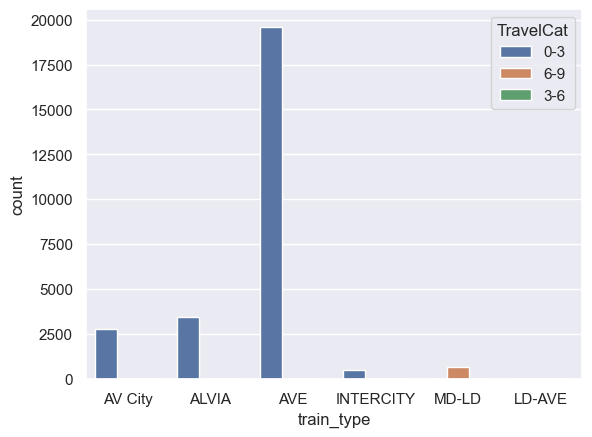

In [47]:
sns.countplot(x='train_type', hue='TravelCat', data=dfS)

#### **Task 23: Show train_type vs price through boxplot**


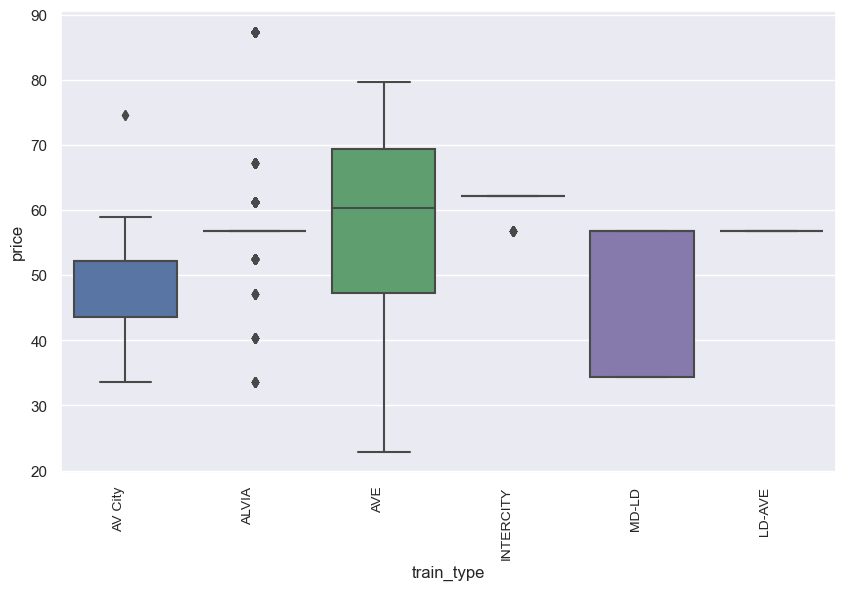

In [48]:
#write code here
plt.figure(figsize=(10,6))
sns.boxplot(x='train_type', y='price', data=dfS)
plt.xticks(fontsize=10, rotation=90, ha='right')
plt.show()

## **Travelling from MADRID to BARCELONA**


#### Task 24: Findout people travelling from MADRID to BARCELONA

In [49]:
#write code here
df2 = df1[(df1['origin']=="MADRID") & (df1['destination']=="BARCELONA")]
df2

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs,TravelCat
79,79,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667,9-12
80,80,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667,9-12
81,81,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667,9-12
82,82,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667,9-12
83,83,MADRID,BARCELONA,AVE,66.75,Turista,Promo,3.150000,3-6
...,...,...,...,...,...,...,...,...,...
215728,215728,MADRID,BARCELONA,AVE,80.15,Turista Plus,Promo,2.750000,0-3
215729,215729,MADRID,BARCELONA,AVE,98.00,Preferente,Promo,3.166667,3-6
215730,215730,MADRID,BARCELONA,AVE,69.80,Turista Plus,Promo,2.833333,0-3
215731,215731,MADRID,BARCELONA,AVE,58.15,Turista,Promo,3.166667,3-6


#### Task 25: Make a plot for finding out travelling hours for each train type

<Axes: xlabel='train_type', ylabel='count'>

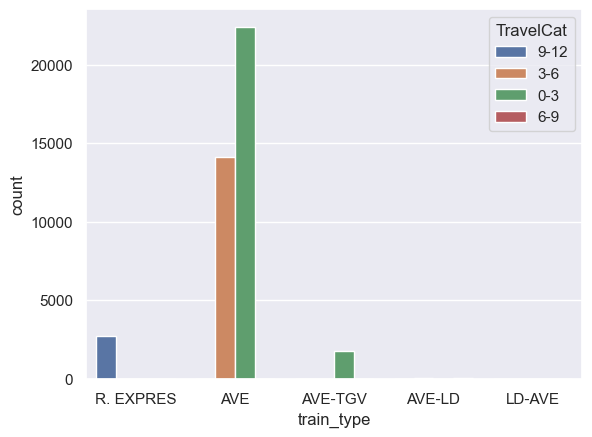

In [50]:
#write code here
sns.countplot(x='train_type', hue='TravelCat', data=df2)

#### **Task 26: Show train_type vs price through boxplot**

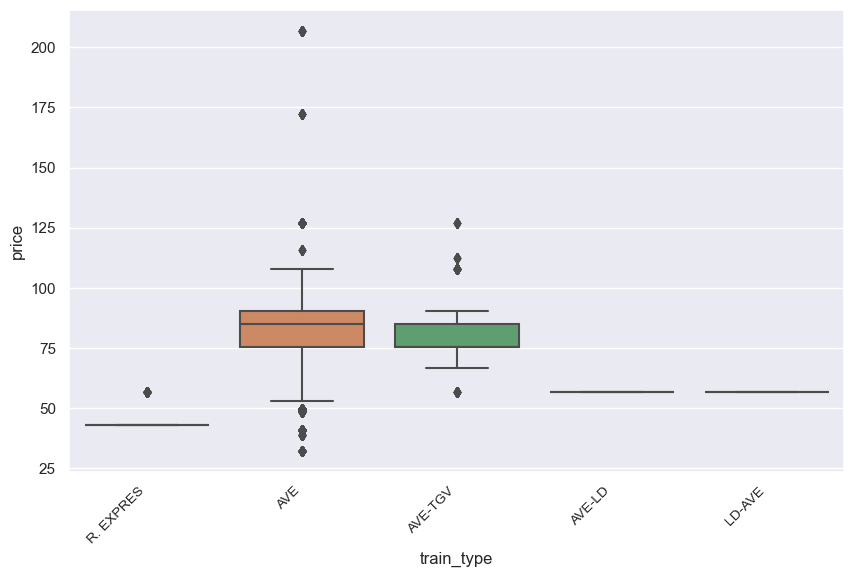

In [51]:
#write code here
plt.figure(figsize=(10,6))
sns.boxplot(x='train_type', y='price', data=df2)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.show()

## **Travelling from MADRID to VALENCIA**

#### Task 27: Findout people travelling from MADRID to VALENCIA

In [52]:
#write code here
df3 = df1[(df1['origin'] == 'MADRID') & (df1['destination'] == 'VALENCIA')]
df3

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs,TravelCat
5,5,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.783333,6-9
6,6,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.716667,6-9
7,7,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.700000,6-9
8,8,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.583333,6-9
9,9,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.366667,6-9
...,...,...,...,...,...,...,...,...,...
215473,215473,MADRID,VALENCIA,AVE,33.65,Turista,Promo,1.700000,0-3
215474,215474,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.283333,6-9
215475,215475,MADRID,VALENCIA,AVE,39.45,Turista,Promo,1.666667,0-3
215476,215476,MADRID,VALENCIA,AVE,45.30,Turista,Promo,1.816667,0-3


#### Task 28: Make a plot for finding out travelling hours for each train type

<Axes: xlabel='train_type', ylabel='count'>

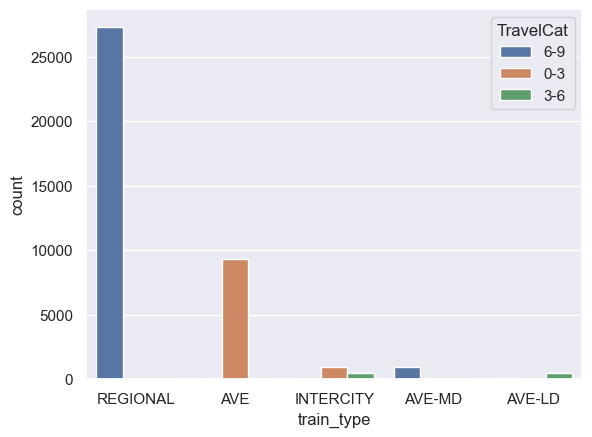

In [53]:
#write code here
sns.countplot(x='train_type', hue='TravelCat', data=df3)

#### **Task 29: Show train_type vs price through boxplot**

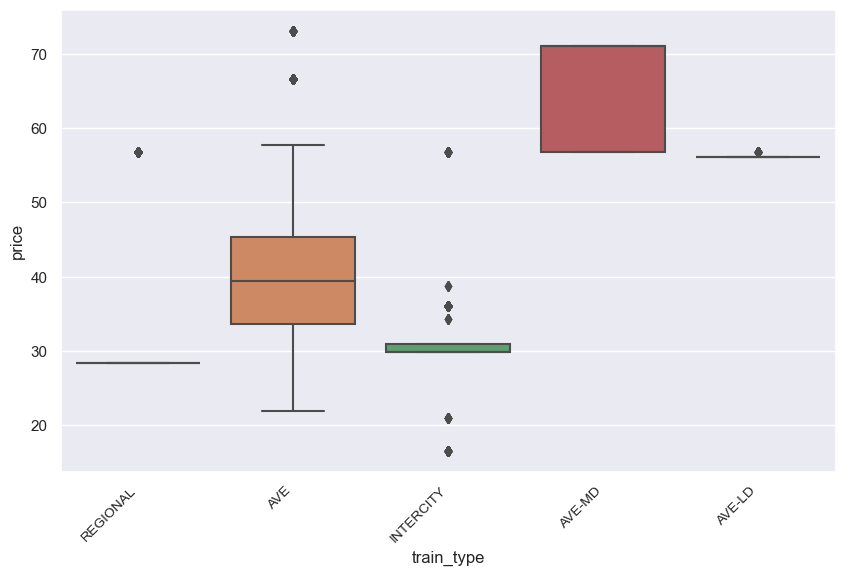

In [54]:
#write code here
plt.figure(figsize=(10,6))
sns.boxplot(x='train_type', y='price', data=df3)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.show()

## **Travelling from MADRID to PONFERRADA**

#### Task 30: Findout people travelling from MADRID to PONFERRADA

In [55]:
#write code here
df4 = df1[(df1['origin']=='MADRID') & (df1['destination']=='PONFERRADA')]
df4

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs,TravelCat
233,233,MADRID,PONFERRADA,AVE-MD,35.750000,Turista con enlace,Promo,3.883333,3-6
234,234,MADRID,PONFERRADA,AVE-LD,31.200000,Turista con enlace,Promo,4.200000,3-6
235,235,MADRID,PONFERRADA,ALVIA,33.500000,Turista,Promo,4.050000,3-6
236,236,MADRID,PONFERRADA,LD-MD,56.723877,Turista con enlace,Promo +,6.533333,6-9
237,237,MADRID,PONFERRADA,LD,42.750000,Turista con enlace,Promo +,4.200000,3-6
...,...,...,...,...,...,...,...,...,...
215709,215709,MADRID,PONFERRADA,AVE-LD,31.200000,Turista con enlace,Promo,4.200000,3-6
215710,215710,MADRID,PONFERRADA,ALVIA,33.500000,Turista,Promo,4.050000,3-6
215711,215711,MADRID,PONFERRADA,LD-MD,56.723877,Turista con enlace,Promo +,6.533333,6-9
215712,215712,MADRID,PONFERRADA,LD,42.750000,Turista con enlace,Promo +,4.200000,3-6


#### Task 31: Make a plot for finding out travelling hours for each train type

<Axes: xlabel='train_type', ylabel='count'>

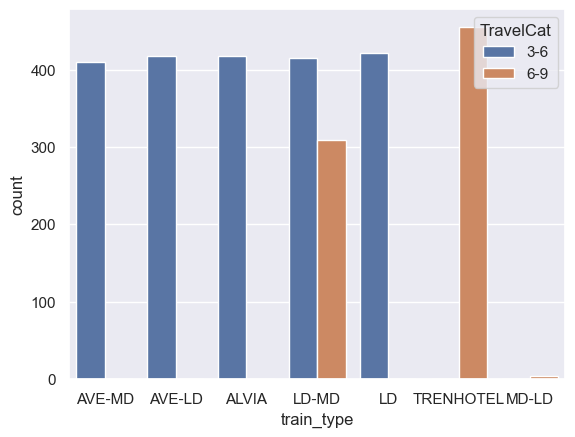

In [56]:
#write code here
sns.countplot(x='train_type', hue='TravelCat', data=df4)

#### **Task 32: Show train_type vs price through boxplot**

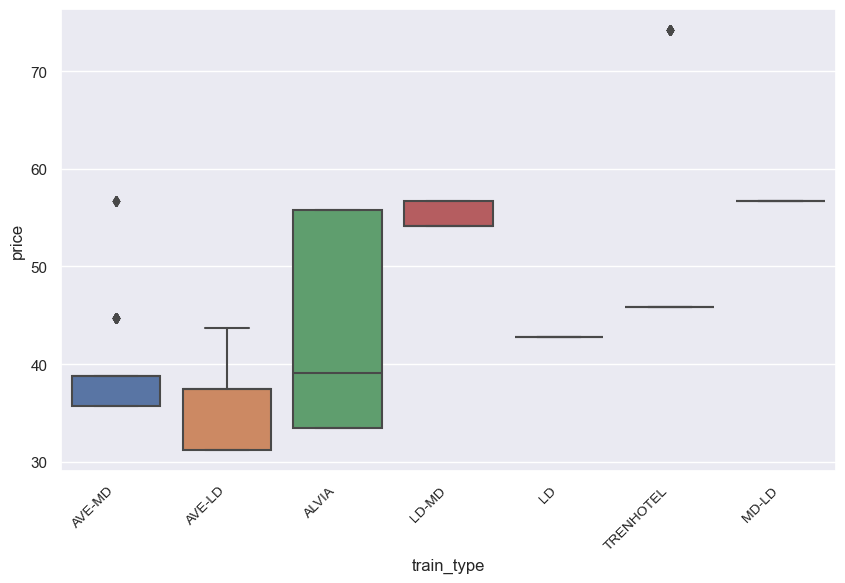

In [57]:
#write code here
plt.figure(figsize=(10,6))
sns.boxplot(x='train_type', y='price', data=df4)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.show()

# Applying Linear  Regression

#### Task 33: Import LabelEncoder library from sklearn 

In [58]:
#write code here
import sklearn.preprocessing

In [59]:
from sklearn.preprocessing import LabelEncoder

**Data Encoding**

In [60]:
lab_en = LabelEncoder()
df.iloc[:,1] = lab_en.fit_transform(df.iloc[:,1])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,3] = lab_en.fit_transform(df.iloc[:,3])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])
df.iloc[:,6] = lab_en.fit_transform(df.iloc[:,6])
df.iloc[:,4] = lab_en.fit_transform(df.iloc[:,4])
df.iloc[:,8] = lab_en.fit_transform(df.iloc[:,8])
df.iloc[:,9] = lab_en.fit_transform(df.iloc[:,9])

In [61]:
df.head()

,index,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,travel_time_in_hrs
0,0,6355,2,1,131,179,11,59.50,4,1,4.700000
1,1,6355,2,1,147,222,11,34.65,4,4,5.800000
2,2,6355,2,1,147,223,12,39.95,4,4,5.916667
3,3,6355,2,1,147,212,11,40.60,4,4,4.983333
4,4,6355,2,1,159,222,0,27.90,2,3,4.133333


In [62]:
df.describe()

,index,price,travel_time_in_hrs
count,215909.000000,215909.000000,215909.000000
mean,107954.000000,56.723877,4.074284
std,62327.703973,24.715321,2.233665
min,0.000000,16.600000,1.633333
25%,53977.000000,28.350000,2.533333
50%,107954.000000,56.723877,2.866667
75%,161931.000000,76.300000,6.700000
max,215908.000000,206.800000,12.416667


In [63]:
df.dtypes

index                   int64
insert_date            object
origin                 object
destination            object
start_date             object
end_date               object
train_type             object
price                 float64
train_class            object
fare                   object
travel_time_in_hrs    float64
dtype: object

#### Task 34: Separate the dependant and independant variables

In [64]:
#write code here
X = df.drop(['price'], axis=1)
Y = df[['price']]
print(X.shape)
print(Y.shape)

(215909, 10)
(215909, 1)


#### Task 35: Import test_train_split from sklearn

In [65]:
#write code here
from sklearn.model_selection import train_test_split

#### Task 36:**Split the data into training and test set**

In [66]:
#write code here
xtrain ,xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=25,shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(161931, 10) (161931, 1)
(53978, 10) (53978, 1)


#### Task 37: Import LinearRegression library from sklearn

In [67]:
#write code here
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#### Task 38: Make an object of LinearRegression( ) and train it using the training data set

In [68]:
#write code here
model.fit(xtrain, ytrain)

LinearRegression()

In [69]:
#write code here
lr = model.predict(xtrain)

In [70]:
df.head(1)

,index,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,travel_time_in_hrs
0,0,6355,2,1,131,179,11,59.5,4,1,4.7


#### Task 39: Find out the predictions using test data set.

In [71]:
#write code here
lr_predict = model.predict(xtest)

In [72]:
lr_predict

array([[69.6354348 ],
       [62.7110419 ],
       [14.76865945],
       ...,
       [54.76561514],
       [29.36954589],
       [54.80856789]])

In [73]:
model.coef_

array([[-6.65145408e-06,  2.17141254e-05, -8.66551057e+00,
        -9.35070174e+00, -6.66138431e-02,  4.99537914e-02,
        -2.04073318e+00, -9.67353278e-01, -7.08571057e+00,
        -3.20169845e+00]])

#### Task 40: Find out the predictions using training data set.

In [74]:
#write code here
lr_predict_train = model.predict(xtrain)
lr_predict_train

array([[62.27154529],
       [49.99291916],
       [81.73873359],
       ...,
       [30.02146079],
       [27.08920075],
       [80.76998962]])

#### Task 41: Import r2_score library form sklearn

In [75]:
#write code here
from sklearn.metrics import r2_score

#### Task 42: Find out the R2 Score for test data and print it.

In [76]:
#write code here
test_r2=r2_score(ytest,lr_predict)
print('R2 score for testing:',test_r2)

R2 score for testing: 0.7295873257851859


#### Task 43: Find out the R2 Score for training data and print it.

In [77]:
lr_r2_train = r2_score(ytrain,lr_predict_train)
print('R2 score for training:',lr_r2_train )

R2 score for training: 0.7289396039797562


Comaparing training and testing R2 scores

In [78]:
print('R2 score for Linear Regression Training Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', test_r2)

R2 score for Linear Regression Training Data is:  0.7289396039797562
R2 score for Linear Regression Testing Data is:  0.7295873257851859


# Applying Polynomial Regression

#### Task 44: Import PolynomialFeatures from sklearn

In [79]:
#write code here
from sklearn.preprocessing import PolynomialFeatures

#### Task 45: Make and object of default Polynomial Features

In [80]:
#write code here


#### Task 46: Transform the features to higher degree features.

In [82]:
#write code here
#X_train_poly,X_test_poly = None

#### Task 47: Fit the transformed features to Linear Regression

In [ ]:
#write code here
poly_model = None

#### Task 48: Find the predictions on the data set

In [ ]:
#write code here
y_train_predicted,y_test_predict = None

#### Task 49: Evaluate R2 score for training data set

In [ ]:
#evaluating the model on training dataset
#write code here
r2_train = None

#### Task 50: Evaluate R2 score for test data set

In [ ]:
# evaluating the model on test dataset
#write code here
r2_test = None

Comaparing training and testing R2 scores

In [ ]:
#write code here
print ('The r2 score for training set is: ',r2_train)
print ('The r2 score for testing set is: ',r2_test)

#### Task 51: Select the best model

**Question: Which model gives the best result for price prediction? Find out the complexity using R2 score and give your answer.**<br>
*Hint: Use for loop for finding the best degree and model complexity for polynomial regression model*

In [ ]:
#write code here
r2_train=[]
r2_test=[]
for i in range(1,6):
    poly_reg = None
    
    X_tr_poly,X_tst_poly = None
    poly = None
    poly.fit(X_tr_poly, Y_train)
   
    y_tr_predicted,y_tst_predict = None
    r2_train.append(r2_score(Y_train, y_tr_predicted))
    r2_test.append(r2_score(Y_test, y_tst_predict))
    
print ('R2 Train', r2_train)
print ('R2 Test', r2_test)

#### Plotting the model

In [ ]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,6)), y=r2_train, label='Training');
plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,6)), y=r2_test, label='Testing');

**Answer**